# Data-driven lingerie shopping


## Additional plots

This is a detailed analysis of [lingerie dataset](https://www.kaggle.com/PromptCloudHQ/innerwear-data-from-victorias-secret-and-others) published on kaggle. It was created by extracting data from from the popular retail sites via PromptCloud's data extraction solutions in June, 2017 to July, 2017.

Sites covered in this analysis:

Amazon <br>
Victoria's Secret<br>
Wacoal aka Btemptd<br>
Calvin Klein<br>
Hanky Panky<br>
Macy's<br>
Topshop USA<br>

# Load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import unicodedata
import matplotlib.pyplot as plt
%matplotlib inline
pals = sns.hls_palette(8)
sns.set_palette(pals)
fig_size=[12,9]
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = fig_size

import warnings
warnings.filterwarnings("ignore")

In [2]:
brands_info = pd.read_csv('data/final_data.csv')

# Additional summary plots
## Percentage discount of all categories together for brands

* Victoria's Secret offers (at least in this dataset) the highest percentage discount with a median around 49% and the median discount is around 16 dollars.
* Calvin Klein offers also a median 48% discount but there are less products with more discount comparing to VS.

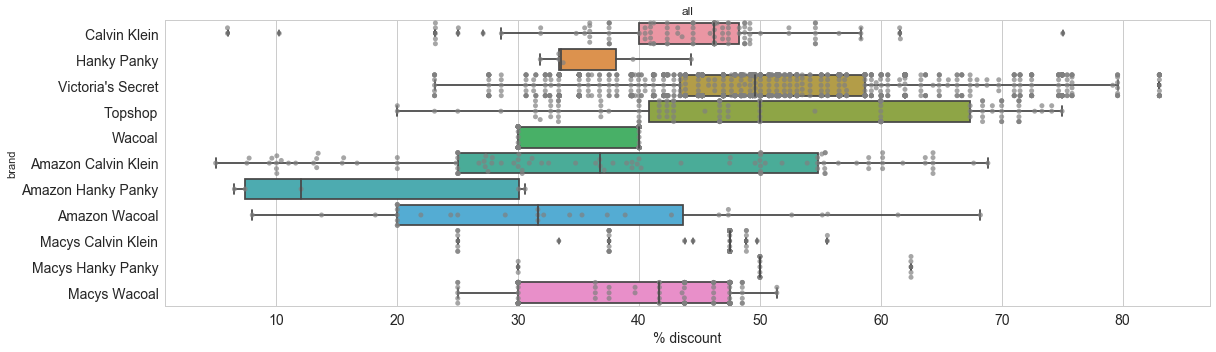

In [3]:
df = brands_info
df = df[df['diff_per']>0]
money = 'diff_per'
name = 'all'
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(17,5))
ax = sns.boxplot(x=money, y='brand', data=df, ax = axes, medianprops={"zorder":3})
ax = sns.swarmplot(x=money, y='brand', data=df, ax = axes, color = 'grey',alpha=0.7)
ax.xaxis.grid(True)
_= ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('% discount', fontsize=14)
_ = ax.set_title(name)
plt.tight_layout()
fig.savefig(money +"_"+ name+ '_boxlots.png')

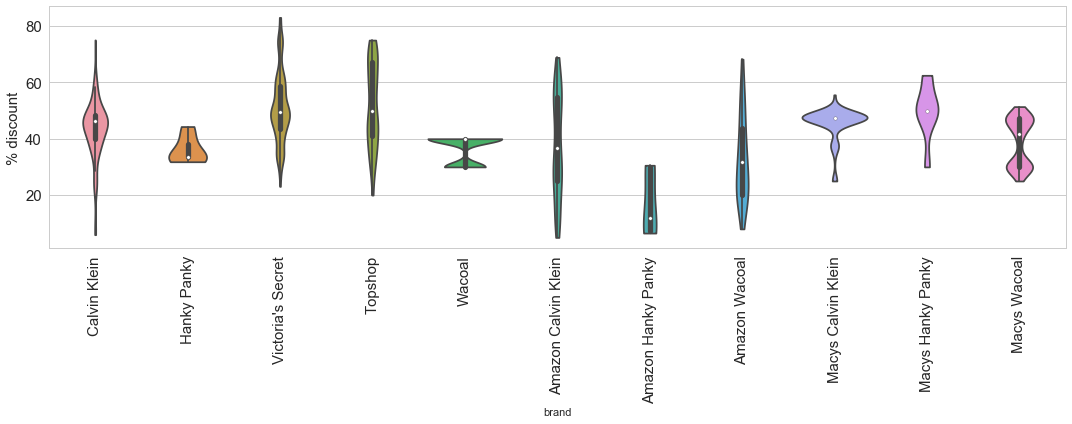

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,6))
ax = sns.violinplot(y=money, x = 'brand', scale='area',data=df, ax=axes, cut = 0, width = 0.8)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_= ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('% discount', fontsize=15)
ax.yaxis.grid(True)
plt.tight_layout()
fig.savefig(money +"_"+ name+ 'violin_temp.png')

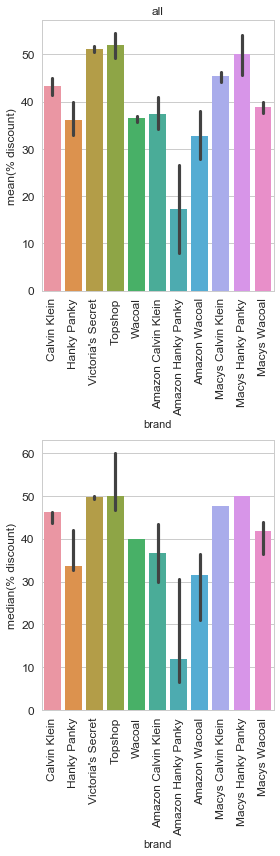

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(4,12))
ax = sns.barplot(y=money, x='brand',data = df, ax = axes[0])
ax.set_ylabel('mean(% discount)', fontsize=12)
ax.yaxis.grid(True)
_ = ax.set_title(name)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_= ax.tick_params(axis='both', which='major', labelsize=12)

ax = sns.barplot(y=money, x='brand', data = df, estimator=np.median, ax = axes[1])
ax.set_ylabel('median(% discount)', fontsize=12)
ax.yaxis.grid(True)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_= ax.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace = 0.3, wspace=0.2)
plt.tight_layout()
fig.savefig(money + "_" + name + '_bars_vertical.png')

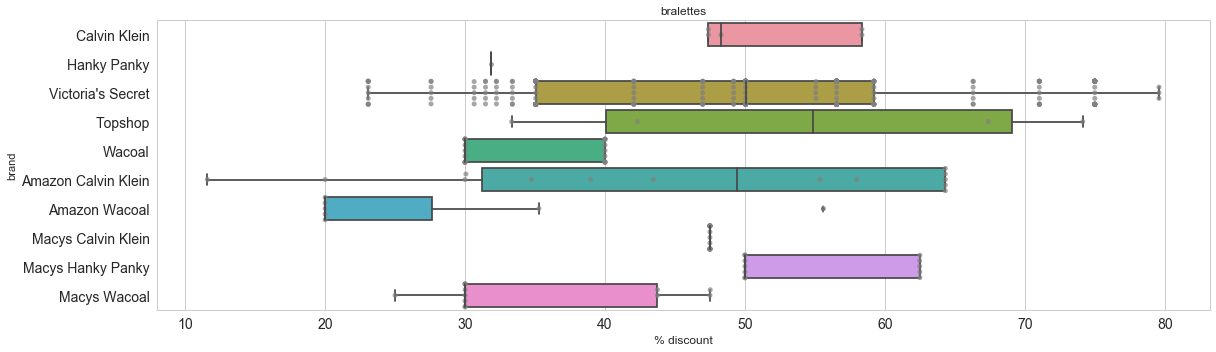

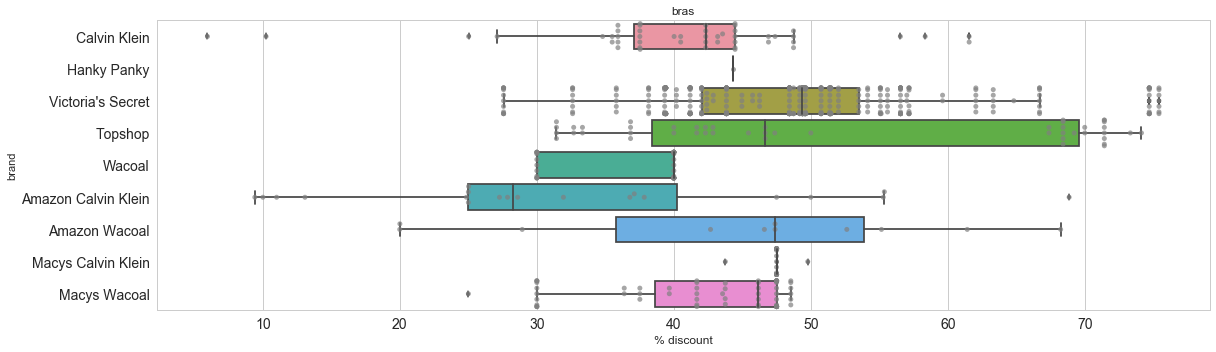

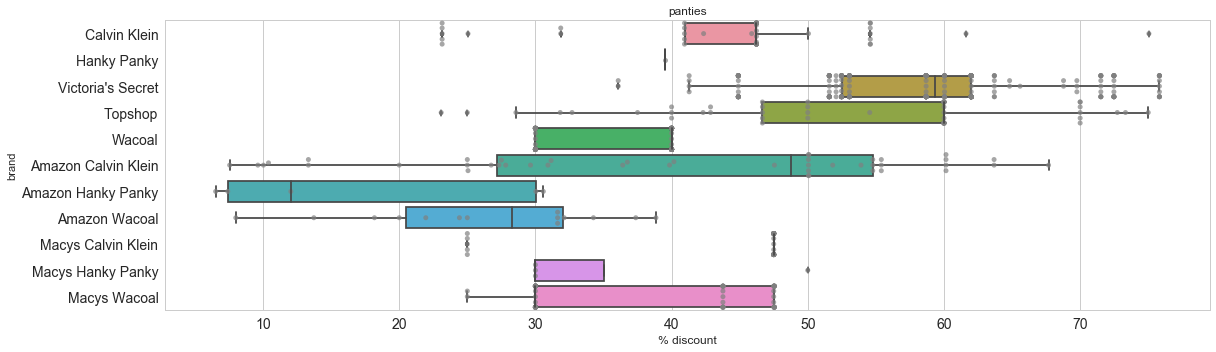

In [6]:
df = brands_info
df = df[df['diff_per']>0]
cats = ['bras', 'bralettes', 'panties']
df = df[df['category'].isin(cats)]
money = 'diff_per'

for name, group in df.groupby('category'):
    fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(17,5))
    ax = sns.boxplot(x=money, y='brand', data=group, ax = axes, medianprops={"zorder":3})
    ax = sns.swarmplot(x=money, y='brand', data=group, ax = axes, color = 'grey',alpha=0.7)
    ax.xaxis.grid(True)
    _= ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel('% discount', fontsize=12)
    _ = ax.set_title(name)
    plt.tight_layout()
    fig.savefig(money +"_"+ name+ '_boxlots.png')

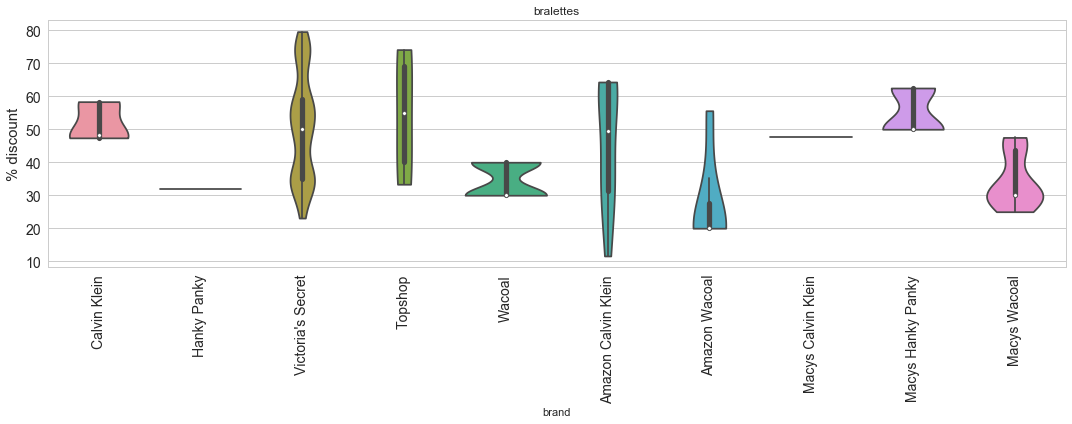

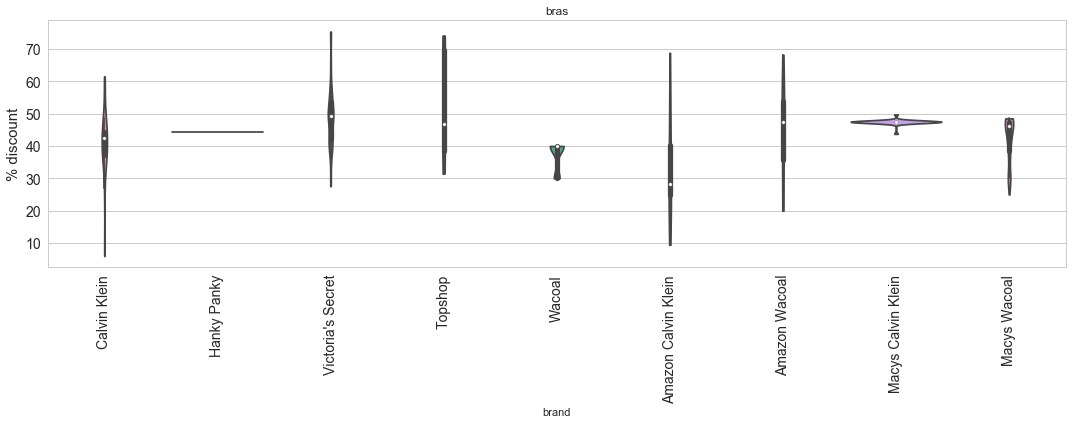

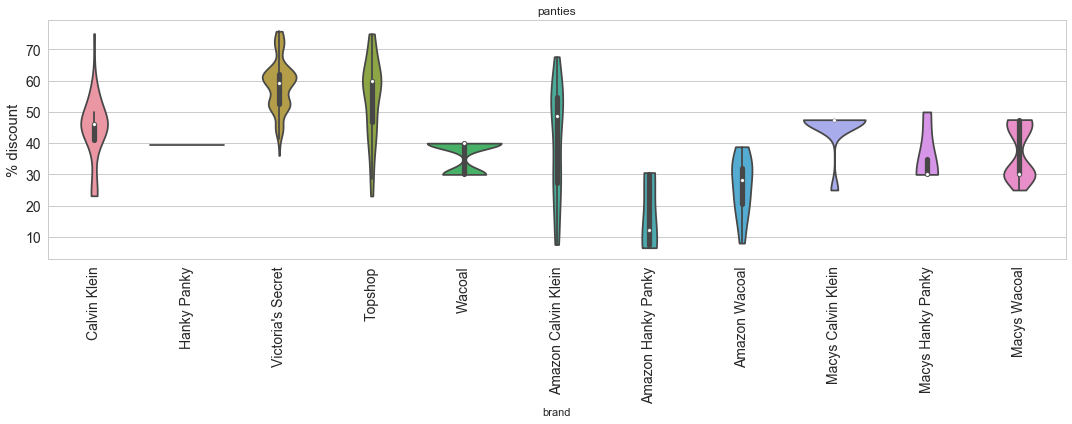

In [7]:
for name, group in df.groupby('category'):
    fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,6))
    ax = sns.violinplot(y=money, x = 'brand', scale='area',data=group, ax=axes, cut = 0, width = 0.8)
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    _= ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_ylabel('% discount', fontsize=15)
    #ax.set_yticklabels([])
    _ = ax.set_title(name)
    ax.yaxis.grid(True)
    plt.tight_layout()
    fig.savefig(money +"_"+ name+ 'violin_temp.png')

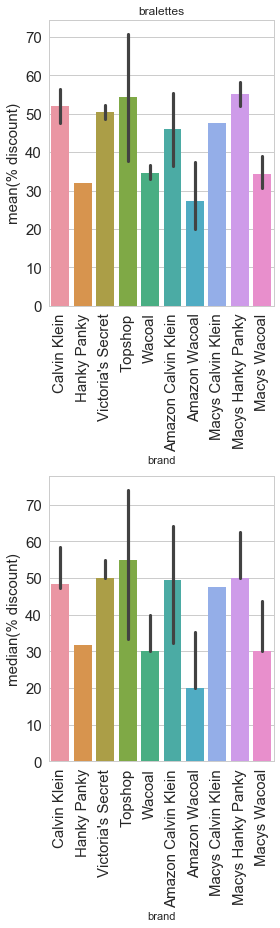

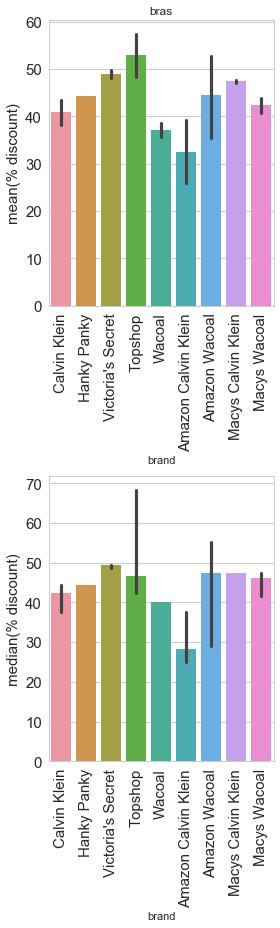

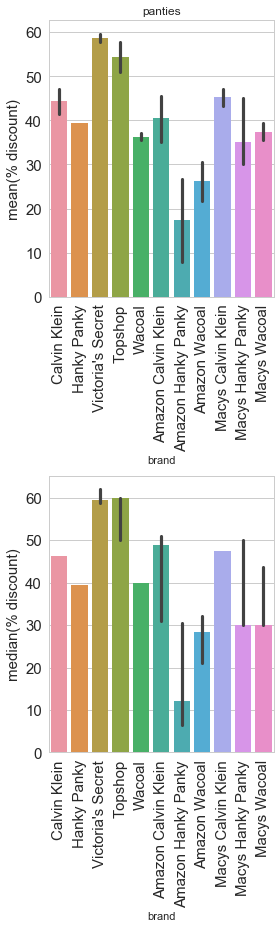

In [ ]:
i = 0
for name, group in df.groupby('category'):
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(4,13))
    ax = sns.barplot(y=money, x = 'brand',  data = group, ax = axes[0])
    ax.set_ylabel('mean(% discount)', fontsize=15)
    ax.yaxis.grid(True)
    _ = ax.set_title(name)
    _= ax.tick_params(axis='both', which='major', labelsize=15)

    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax = sns.barplot(y=money, x = 'brand',  data = group, estimator=np.median, ax = axes[1])
    ax.set_ylabel('median(% discount)', fontsize=15)
    ax.yaxis.grid(True)
    #ax.set_yticklabels([])
    _= ax.tick_params(axis='both', which='major', labelsize=15)

    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.subplots_adjust(hspace = 0.3, wspace=0.2)
    plt.tight_layout()
    fig.savefig(money + "_" + name + '_bars_vertical.png')

### MRP

In [ ]:
df = brands_info
cats = ['bras', 'bralettes', 'panties']
df = df[df['category'].isin(cats)]
money = 'mrp'

for name, group in df.groupby('category'):
    fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(17,5))
    #if name == 'bralettes':
        #major_ticks = np.arange(15, np.max(group[money]), 10) 
    #elif name == 'bras':
        #major_ticks = np.arange(10, np.max(group[money]), 10) 
    #elif name == 'panties':
        #major_ticks = np.arange(5, np.max(group[money]), 5) 
    #ax.set_xticks(major_ticks) 
    ax = sns.boxplot(x=money, y='brand', data=group, ax = axes, medianprops={"zorder":3})
    ax = sns.swarmplot(x=money, y='brand', data=group, ax = axes, color = 'grey',alpha=0.7)
    #_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.xaxis.grid(True)
    _= ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel(money, fontsize=12)
    #_ = ax.set_ylabel(name)
    _ = ax.set_title(name)
    plt.tight_layout()
    fig.savefig(money +"_"+ name+ '_boxlots.png')


In [ ]:
for name, group in df.groupby('category'):
    fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,6))
    ax = sns.violinplot(y=money, x = 'brand', scale='area',data=group, ax=axes, cut = 0, width = 0.8)
    #if name!='panties':
        #ax = sns.swarmplot(x="brand", y="mrp", data=group ,color="grey",ax=axes[i,1] )
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    _= ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_ylabel(money, fontsize=15)
    #ax.set_yticklabels([])
    _ = ax.set_title(name)
    #plt.subplots_adjust(hspace = 0.7, wspace=0.2)
    ax.yaxis.grid(True)
    plt.tight_layout()
    fig.savefig(money +"_"+ name+ 'violin_temp.png')

In [ ]:
i = 0
for name, group in df.groupby('category'):
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(4,13))
    ax = sns.barplot(y=money, x = 'brand',  data = group, ax = axes[0])
    ax.set_ylabel('mean(' + money + ')', fontsize=13)
    ax.yaxis.grid(True)
    _ = ax.set_title(name)
    _= ax.tick_params(axis='both', which='major', labelsize=13)

    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax = sns.barplot(y=money, x = 'brand',  data = group, estimator=np.median, ax = axes[1])
    ax.set_ylabel('median(' + money + ')', fontsize=13)
    ax.yaxis.grid(True)
    #ax.set_yticklabels([])
    _= ax.tick_params(axis='both', which='major', labelsize=13)

    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.subplots_adjust(hspace = 0.3, wspace=0.2)
    plt.tight_layout()
    fig.savefig(money + "_" + name + '_bars_vertical.png')

In [ ]:
i = 0

    
fig, axes = plt.subplots(nrows=len(cats)*2, ncols=1,figsize=(6,25))
for name, group in df.groupby('category'):
    ax = sns.barplot(x=money, y = 'brand',  data = group, ax = axes[i])
    ax.set_xlabel('mean(' + money + ')', fontsize=14)
    ax.xaxis.grid(True)
    _ = ax.set_title(name)
    _= ax.tick_params(axis='both', which='major', labelsize=14)

   # _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax = sns.barplot(x=money, y = 'brand',  data = group, estimator=np.median, ax = axes[i+1])
    ax.set_xlabel('median(' + money + ')', fontsize=14)
    ax.xaxis.grid(True)
    #ax.set_yticklabels([])
    _= ax.tick_params(axis='both', which='major', labelsize=14)


    #_= ax.tick_params(axis='x',which='both', bottom='off',top='off', labelbottom='off')
    #_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)#ax = sns.swarmplot(y="diff_per", x = 'category', hue ='brand', data=df, ax = axes, color = 'grey', dodge=True)
    i = i+2
    plt.subplots_adjust(hspace = 0.3, wspace=0.2)
    plt.tight_layout()
fig.savefig('temp1.png')

*************

**I will be happy to hear remarks or comments. If you liked the Kernel, please upvote :)**

**Have fun with the data!**
*************